# Final Decimated Models Display For Report

Chris Field, May 2022

Approach:
* Load in decimated Numpy format model a
* Plot in matplotlib


In [1]:
import os  # operating system
import sys # to add src directory for my modules
#
import numpy as np
import math
import random
#
from pprint import pprint
#
# Plotting requirements
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
import matplotlib.font_manager # different fonts
from matplotlib import rcParams # runtime config to set fonts

In [2]:
# Using rcParams set the global fonts for Matplotlib
# Global parameters for Matplotlib: set font etc.
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Gill Sans MT']
rcParams['font.serif'] = ['Garamond']
rcParams['font.size'] = '16'
#

## Define functions

In [3]:
def grid_plot(grid, cmap='viridis', interpolation='none', origin='upper', aspect='auto'):
    """
    Model plotting for before and after decimation. Labels are that of the grid.
    
    grid -- model as numpy array
    
    Remaining parameters are as matplotlib.pyplot.imshow
    
    """
    plt.figure(figsize=(16,8))
    c1 = plt.imshow(grid, cmap=cmap, interpolation=interpolation, origin=origin, aspect=aspect)
    plt.clim(1500,7000)
    plt.colorbar(c1, shrink=0.67)
    plt.show()

In [4]:
def grid_plot_publication(grid,title='title', fig_out=False, location='./', fig_name='file'):
    """
    Plot (final, decimated) velocity model with correct axis and nice colours for publication
    grid - numpy array, velocity model
    title - the title, a string
    fig_out - Boolean for whether to export the file
    """
    fig = plt.figure(figsize=(14,14)) 
    ax = fig.add_subplot(1,1,1)

    # Define my two colour colour pallete
    cmap = colors.ListedColormap(['#1f77b4','#1fb45c'])
    bounds=[2000,6000]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # Set up legend:
    patches = [ mpatches.Patch(color='#1f77b4', alpha=0.7, label="$\mathregular{2000 ms^{-1}}$") ,  
               mpatches.Patch(color='#1fb45c', alpha=0.7, label="$\mathregular{6000 ms^{-1}}$") ]
    ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , frameon=False)

    ax.set_title(title)

    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Depth (m)')

    # Actually plot:
    ax.imshow(grid, cmap=cmap, interpolation='none', extent=[0,10000, 4000, 0], alpha=0.7)

    ## Remove axis lines.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()

    plt.show()

    if fig_out:
        fig_name=location + fig_name  +'.png'
        fig.savefig(fig_name,facecolor = 'w',bbox_inches="tight",dpi=1000)

# Input and Output Pareto models

In [5]:
location_out='./Pictures/Decimated_Model_plots/'
location_in = './Input_2/'

# If necessary make output folders
if not os.path.exists(location_out) :
    os.makedirs(location_out)

In [6]:
# List all numpy files:
files = []
for file in os.listdir(location_in):
    if file.endswith(".npy"):
        file_noext = file.split('.')[0]
        files.append(file_noext)
pprint(files)


['2022-01-17_beta_1p89',
 '2022-01-17_beta_1p89_DECIMATE',
 '2022-01-17_beta_1p92',
 '2022-01-17_beta_1p92_DECIMATE',
 '2022-01-17_constant',
 '2022-01-17_constant_DECIMATE',
 '2022-01-17_c_1p5',
 '2022-01-17_c_1p5_DECIMATE',
 '2022-01-17_c_2p0',
 '2022-01-17_c_2p0_DECIMATE',
 '2022-01-17_sine_100',
 '2022-01-17_sine_1000',
 '2022-01-17_sine_1000_DECIMATE',
 '2022-01-17_sine_100_DECIMATE']


In [7]:
file = '2022-01-17_c_1p5_DECIMATE'

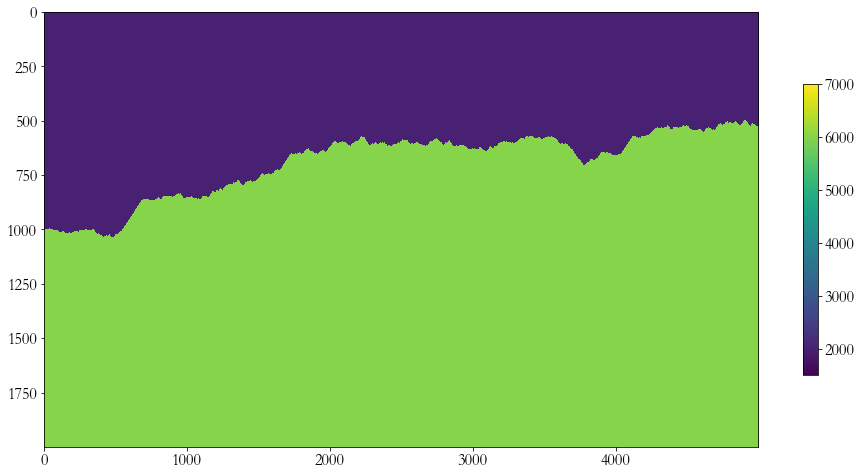

In [8]:
grid = np.load(location_in + file+ '.npy')
grid_plot(grid, cmap='viridis', interpolation='none', origin='upper', aspect='auto')

In [9]:
title = 'Pareto Faulting Model, $\mathregular{c=1.5}$'

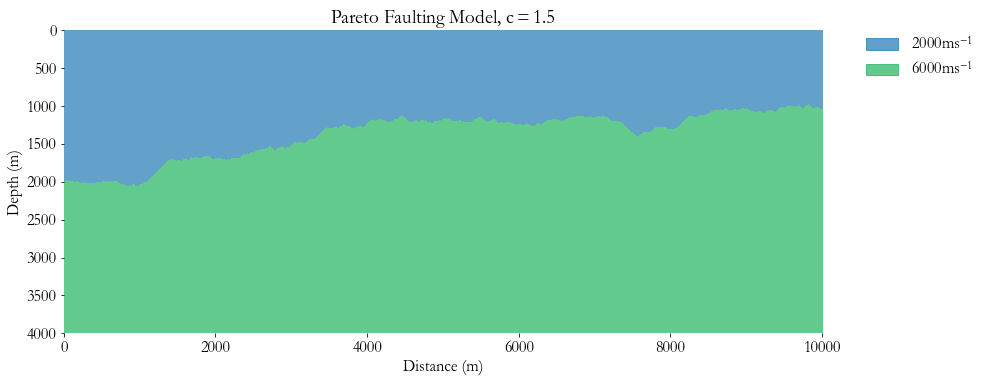

In [10]:
grid_plot_publication(grid, title=title, fig_out=True, location=location_out, fig_name='Pareto_c1p5_for_report')

In [11]:
file = '2022-01-17_c_2p0_DECIMATE'

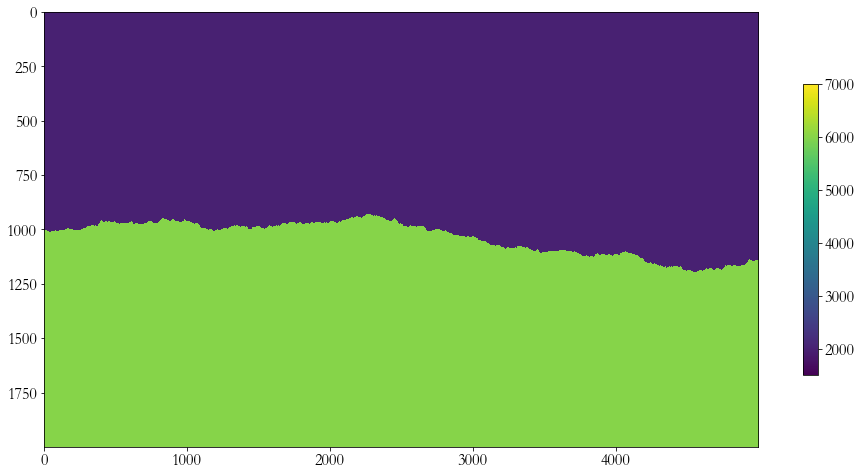

In [12]:
grid = np.load(location_in + file+ '.npy')
grid_plot(grid, cmap='viridis', interpolation='none', origin='upper', aspect='auto')

In [13]:
title = 'Pareto Faulting Model, $\mathregular{c=2.0}$'

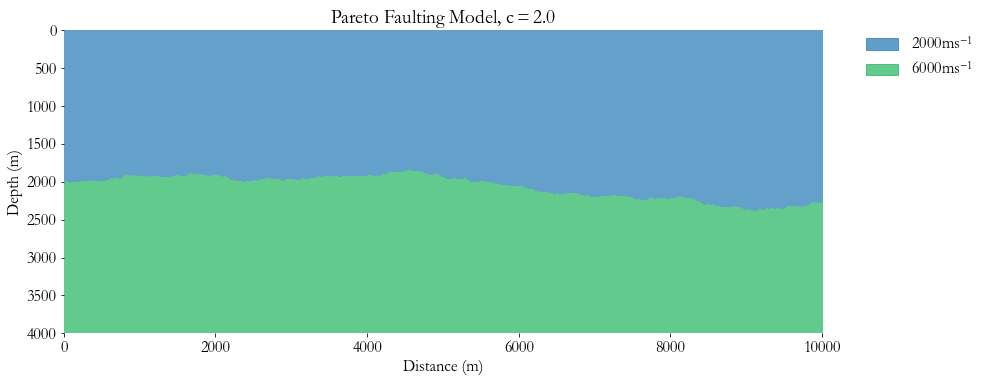

In [14]:
grid_plot_publication(grid, title=title, fig_out=True, location=location_out, fig_name='Pareto_c2p0_for_report')

# Input and output spectral slope methods

In [15]:
# List all numpy files:
files = []
for file in os.listdir(location_in):
    if file.endswith(".npy"):
        file_noext = file.split('.')[0]
        files.append(file_noext)
pprint(files)


['2022-01-17_beta_1p89',
 '2022-01-17_beta_1p89_DECIMATE',
 '2022-01-17_beta_1p92',
 '2022-01-17_beta_1p92_DECIMATE',
 '2022-01-17_constant',
 '2022-01-17_constant_DECIMATE',
 '2022-01-17_c_1p5',
 '2022-01-17_c_1p5_DECIMATE',
 '2022-01-17_c_2p0',
 '2022-01-17_c_2p0_DECIMATE',
 '2022-01-17_sine_100',
 '2022-01-17_sine_1000',
 '2022-01-17_sine_1000_DECIMATE',
 '2022-01-17_sine_100_DECIMATE']


In [16]:
file = '2022-01-17_beta_1p89_DECIMATE'

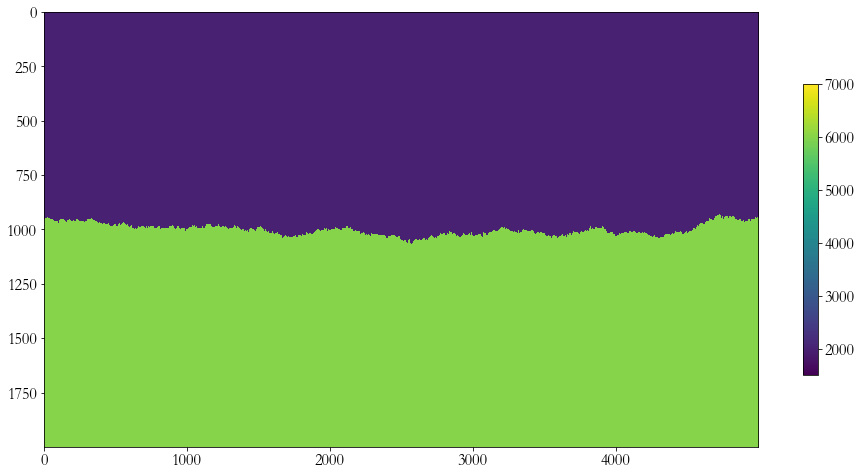

In [17]:
grid = np.load(location_in + file+ '.npy')
grid_plot(grid, cmap='viridis', interpolation='none', origin='upper', aspect='auto')

In [18]:
title = r'Scaled Gaussian Noise with $\mathregular{\beta=1.89}$'

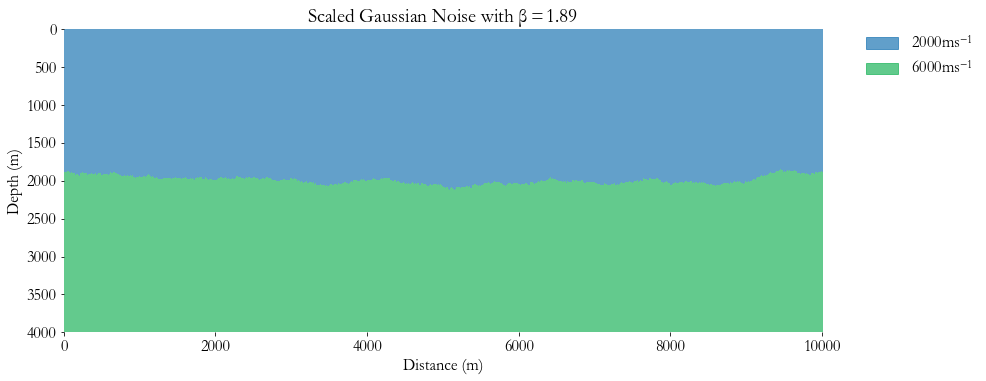

In [19]:
grid_plot_publication(grid, title=title, fig_out=True, location=location_out, fig_name='spectral_slope_1p89_for_report')

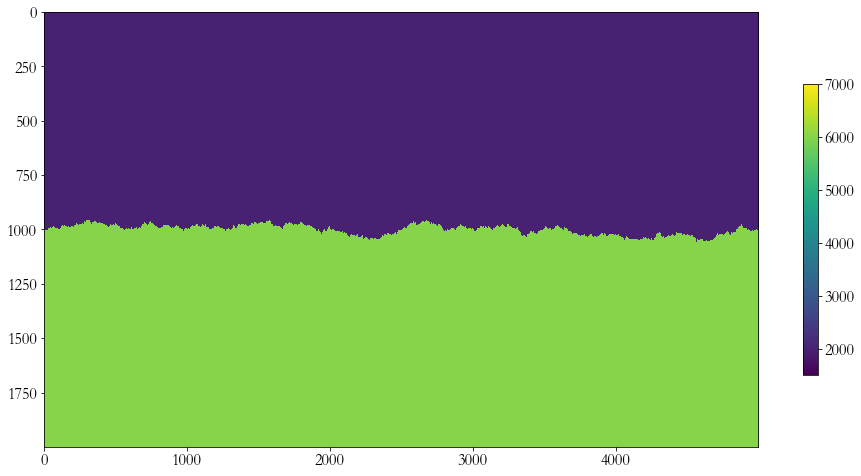

In [20]:
file = '2022-01-17_beta_1p92_DECIMATE'
grid = np.load(location_in + file+ '.npy')
grid_plot(grid, cmap='viridis', interpolation='none', origin='upper', aspect='auto')

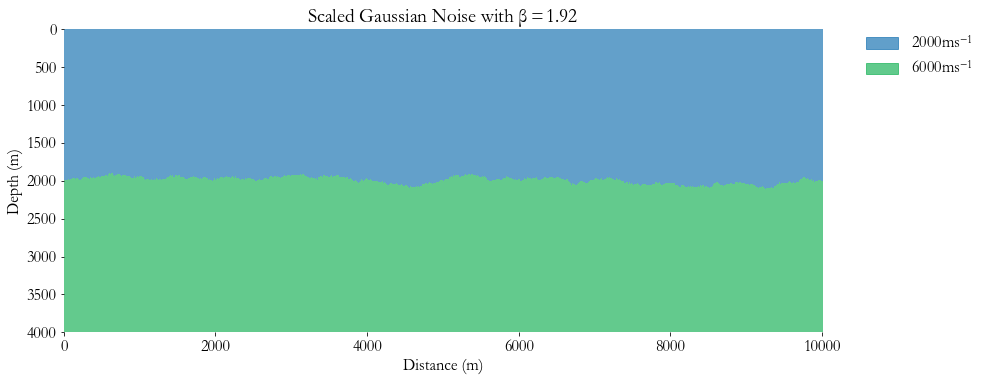

In [21]:
title = r'Scaled Gaussian Noise with $\mathregular{\beta=1.92}$'
grid_plot_publication(grid, title=title, fig_out=True, location=location_out, fig_name='spectral_slope_1p92_for_report')